In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# for i in range(3, 19):
#     fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

# for i in range(3, 8):
#     fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 1.1137
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def., try to make pos.def.
W MnPosDef Matrix forced pos-def by adding to diagonal 0.662391
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0144268
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0163197
W MnPosDef Matrix forced pos-def by adding to diagonal 0.041587


{'cvl': array([6.78543728, 0.09609082]),
 'cvr': array([5.19412859, 0.10443912]),
 'csl': array([2.97303077, 0.15029266]),
 'csr': array([3.00457446, 0.15791822]),
 'ctl': array([3.71131385e+00, 3.57136593e-03]),
 'FFK_decorrelated[0]': array([-0.07300012,  0.61071608]),
 'FFK_decorrelated[1]': array([0.72292929, 0.67946253]),
 'FFK_decorrelated[2]': array([0.54036767, 0.33253307]),
 'FFK_decorrelated[3]': array([-0.25835119,  0.90690532]),
 'FFK_decorrelated[4]': array([0.19268601, 0.80988992]),
 'FFK_decorrelated[5]': array([-0.33984347,  0.49146783]),
 'FFK_decorrelated[6]': array([0.1940991 , 0.84626946]),
 'FFK_decorrelated[7]': array([0.08902882, 0.80213109]),
 'mu': array([1., 0.]),
 'stat': [[0.9989104634559698, 0.0024564910521746586],
  [1.002510366507021, 0.002056940944504815],
  [1.0018801261803751, 0.0017677443860873998],
  [0.9964027184703692, 0.001679992508334338],
  [0.9961411558063611, 0.0017415597674701466],
  [1.0033661856052547, 0.0018622610225730307],
  [1.003863048

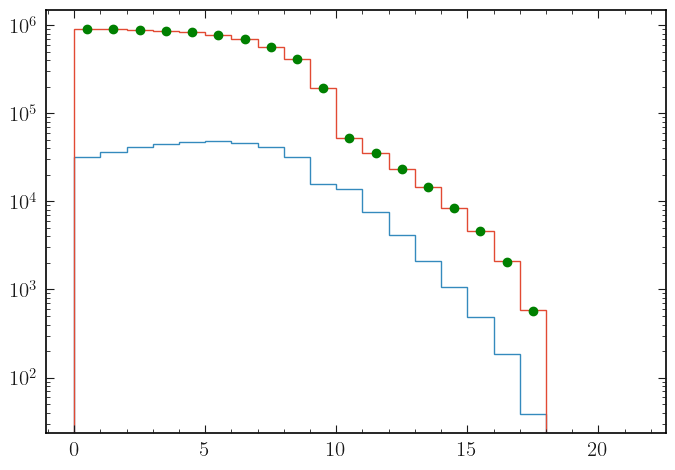

In [5]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')
plt.yscale('log')